<a href="https://colab.research.google.com/github/Aakash-1s/SDC-GENAI/blob/main/Housing_pricing_using_synthetic_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Root Mean Squared Error (RMSE): 23889.24


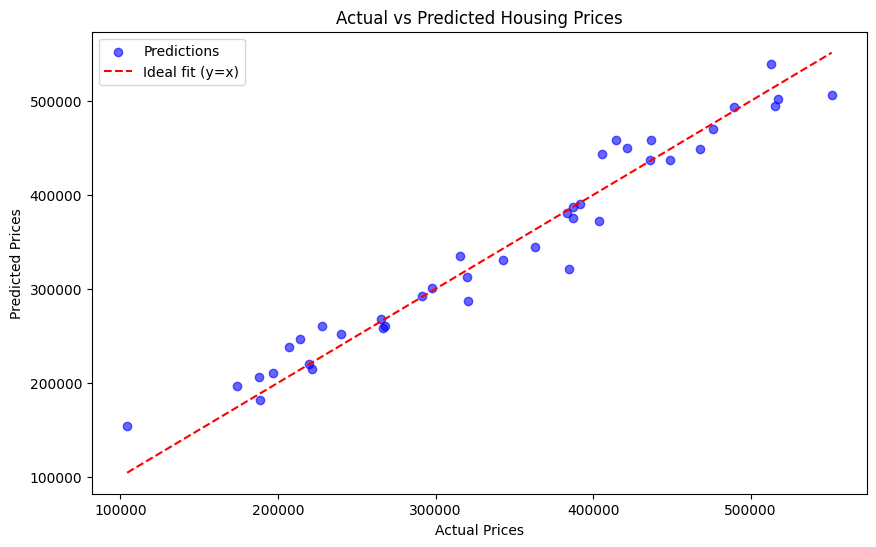

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Step 1: Generate synthetic data
np.random.seed(42)

# Generate synthetic features
num_samples = 200
square_footage = np.random.uniform(500, 4000, num_samples)  # Square footage of houses (500-4000 sq ft)
num_rooms = np.random.randint(1, 8, num_samples)  # Number of rooms (1-7 rooms)
location_quality = np.random.uniform(0, 10, num_samples)  # Location quality score (0-10)

# House price based on a linear combination of features + some random noise
prices = (50000 + 100 * square_footage + 15000 * num_rooms + 2000 * location_quality
          + np.random.normal(0, 20000, num_samples))  # Adding some noise to simulate real-world data

# Step 2: Prepare the data (features and target variable)
X = np.column_stack((square_footage, num_rooms, location_quality))  # Feature matrix
y = prices  # Target variable (prices)

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Make predictions on the test data
y_pred = model.predict(X_test)

# Step 6: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Step 7: Visualize the actual vs predicted prices for the test set (only for 2D features for simplicity)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal fit (y=x)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Housing Prices')
plt.legend()
plt.show()
